Sales Data Processing 

Step 1: Data Ingestion

In [4]:
import pandas as pd

#load data from csv
data = pd.read_csv("sales_data.csv")

#Display the data
print(data)

          Date   Product  Quantity  Price
0   2023-01-01  Widget A      10.0   15.5
1   2023-01-01  Widget B       5.0   20.0
2   2023-01-02  Widget A       8.0   15.5
3   2023-01-02  Widget C       3.0   25.0
4   2023-01-03  Widget A      15.0    NaN
5   2023-01-03  Widget B       NaN   20.0
6   2023-01-04  Widget C       7.0   25.0
7   2023-01-05  Widget A      10.0   15.5
8   2023-01-05  Widget B      10.0   20.0
9   2023-01-06  Widget D       5.0   30.0
10  2023-01-06  Widget E       3.0   40.0
11  2023-01-07  Widget A      12.0   15.5
12  2023-01-07  Widget C       6.0   25.0
13  2023-01-08  Widget D       8.0   30.0
14  2023-01-08  Widget B      10.0   20.0


tep 2: Data Cleaning

In [5]:
#check for missing values

print(data.isnull().sum())

#Fill missing  'Quantity' with 0, 'Price' with mean, and drop rows with missing 'Date' or 'Product'
data['Quantity'].fillna(0, inplace=True)
data['Price'].fillna(data['Price'].mean(), inplace=True)
data.dropna(subset=['Date','Product'], inplace=True)

#Remove duplicates
data.drop_duplicates(inplace=True)

#Verify the cleaning
print(data.isnull().sum())


Date        0
Product     0
Quantity    1
Price       1
dtype: int64
Date        0
Product     0
Quantity    0
Price       0
dtype: int64


Step 3: Data Transformation

In [12]:
#Create a new coulmn for Total sales

data['Total_Sales'] = data['Quantity'] * data['Price']

#Display the transformed data
print(data)

          Date   Product  Quantity      Price  Total_Sales
0   2023-01-01  Widget A      10.0  15.500000   155.000000
1   2023-01-01  Widget B       5.0  20.000000   100.000000
2   2023-01-02  Widget A       8.0  15.500000   124.000000
3   2023-01-02  Widget C       3.0  25.000000    75.000000
4   2023-01-03  Widget A      15.0  22.642857   339.642857
5   2023-01-03  Widget B       0.0  20.000000     0.000000
6   2023-01-04  Widget C       7.0  25.000000   175.000000
7   2023-01-05  Widget A      10.0  15.500000   155.000000
8   2023-01-05  Widget B      10.0  20.000000   200.000000
9   2023-01-06  Widget D       5.0  30.000000   150.000000
10  2023-01-06  Widget E       3.0  40.000000   120.000000
11  2023-01-07  Widget A      12.0  15.500000   186.000000
12  2023-01-07  Widget C       6.0  25.000000   150.000000
13  2023-01-08  Widget D       8.0  30.000000   240.000000
14  2023-01-08  Widget B      10.0  20.000000   200.000000


Step 4: Data Analysis

In [14]:
#Group by product and sum up total sales
product_sales = data.groupby('Product')['Total_Sales'].sum().reset_index()

#Display the sales per product
print(product_sales)

    Product  Total_Sales
0  Widget A   959.642857
1  Widget B   500.000000
2  Widget C   400.000000
3  Widget D   390.000000
4  Widget E   120.000000


Visualize the total sales per product

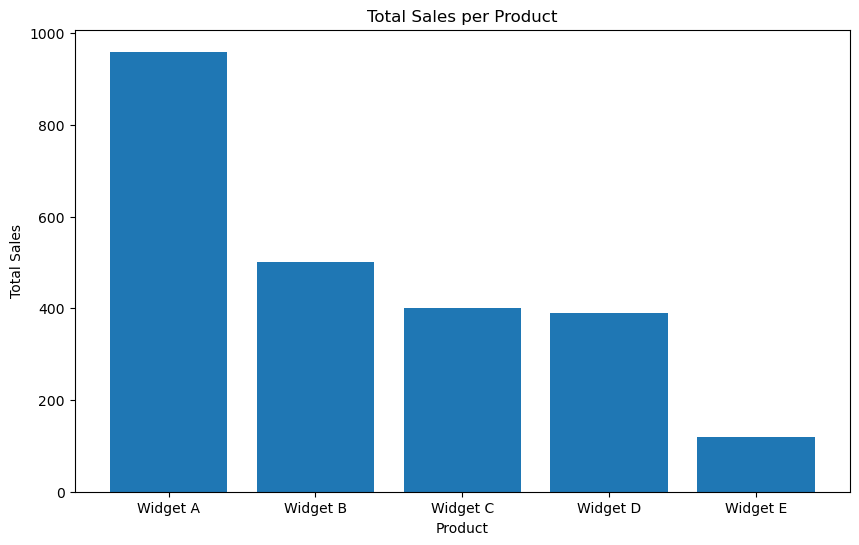

In [19]:
import matplotlib.pyplot as plt 

#Plot total sales per product
plt.figure(figsize=(10, 6))
plt.bar(product_sales['Product'], product_sales['Total_Sales'])
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Total Sales per Product')
plt.show()

Step 5: Save the Cleaned Data

In [ ]:
#Save the cleaned and processed data to a new csv file

data.to_csv("cleand_sales_data.csv", index=False)

print("Data saved to cleaned_sales_data.csv")

Data saved to cleaned_sales_data.csv
